In [1]:
#Let's see how harmful the overfitting might be
import numpy as np
import matplotlib.pyplot as plt


Let's make some functions that might help us!

In [2]:
#Makes polynomials based on the degree that we give
#If deg=3 we will have a polynomial of dergree 3
#w_3*x^3+w_2*x^2+w_1*x^1+w_0
def make_poly(X, deg):
    n = len(X)
    data = [np.ones(n)]
    for d in range(deg):
        data.append(X**(d+1))
    return np.vstack(data).T

#Finds the values of w_i, and returns the values in a vector
def fit(X, Y):
    return np.linalg.solve(X.T.dot(X), X.T.dot(Y))

#Show us haw many random points it takes as sample (train set) and shows how the polynomial
#fit the lines 
def fit_and_display(X, Y, sample, deg):
    N = len(X)
    train_idx = np.random.choice(N, sample)
    Xtrain = X[train_idx]
    Ytrain = Y[train_idx]

    plt.scatter(Xtrain, Ytrain)
    plt.show()

    # fit polynomial
    Xtrain_poly = make_poly(Xtrain, deg)
    w = fit(Xtrain_poly, Ytrain)

    # display the polynomial
    X_poly = make_poly(X, deg)
    Y_hat = X_poly.dot(w)
    plt.plot(X, Y)
    plt.plot(X, Y_hat)
    plt.scatter(Xtrain, Ytrain)
    plt.title("deg = %d" % deg)
    plt.show()

#Gets the mse
def get_mse(Y, Yhat):
    d = Y - Yhat
    return d.dot(d) / len(d)

#Gets the error (mse) of the train and the test 
#the graphs shows us that we should find a point where the error is the lowest
#and in most cases it is not a big polynomial
def plot_train_vs_test_curves(X, Y, sample=20, max_deg=20):
    N = len(X)
    train_idx = np.random.choice(N, sample)
    Xtrain = X[train_idx]
    Ytrain = Y[train_idx]

    test_idx = [idx for idx in range(N) if idx not in train_idx]
    # test_idx = np.random.choice(N, sample)
    Xtest = X[test_idx]
    Ytest = Y[test_idx]

    mse_trains = []
    mse_tests = []
    for deg in range(max_deg+1):
        Xtrain_poly = make_poly(Xtrain, deg)
        w = fit(Xtrain_poly, Ytrain)
        Yhat_train = Xtrain_poly.dot(w)
        mse_train = get_mse(Ytrain, Yhat_train)

        Xtest_poly = make_poly(Xtest, deg)
        Yhat_test = Xtest_poly.dot(w)
        mse_test = get_mse(Ytest, Yhat_test)

        mse_trains.append(mse_train)
        mse_tests.append(mse_test)

    plt.plot(mse_trains, label="train mse")
    plt.plot(mse_tests, label="test mse")
    plt.legend()
    plt.show()

    plt.plot(mse_trains, label="train mse")
    plt.legend()
    plt.show()

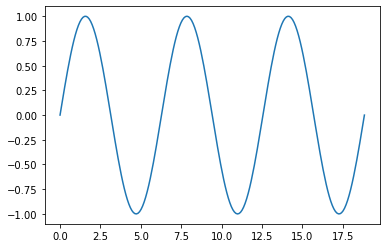

In [10]:
# make up some data and plot it
#Let's create a sine function
N = 200
X = np.linspace(0, 6*np.pi, N)
Y = np.sin(X)
#Let's graph it 
plt.plot(X, Y)
plt.show()




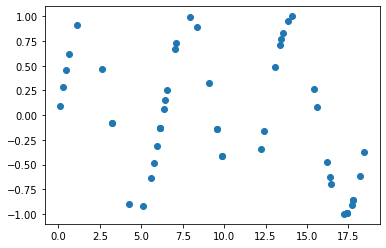

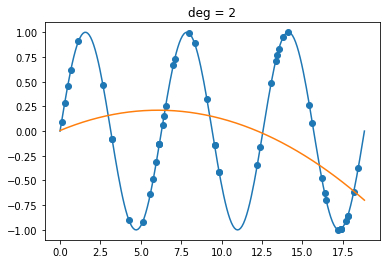

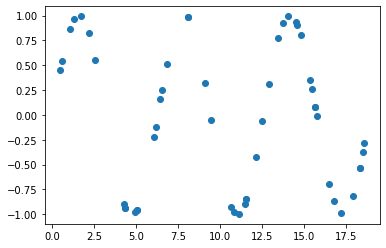

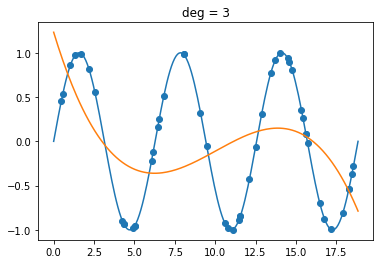

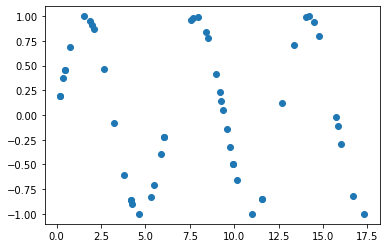

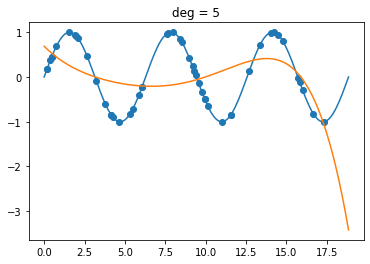

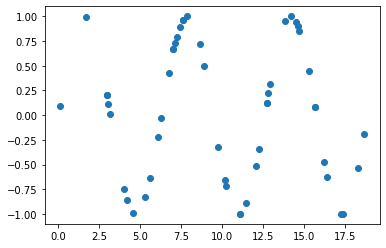

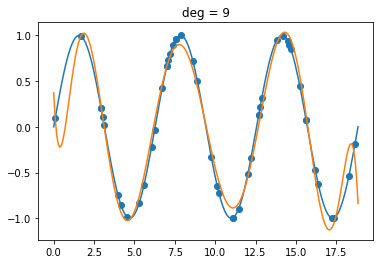

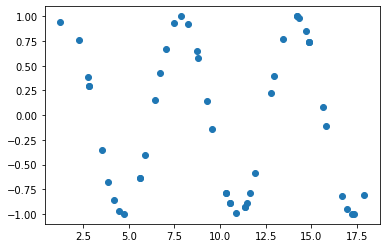

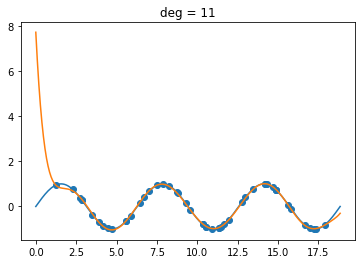

In [12]:
#Let's use some polynomials and see how well they fit in the sine function
for deg in (2, 3, 5, 9, 11):
    fit_and_display(X, Y, 50, deg)

In the last 5 graphs we see that:


○ Degree = 2 The aproximation is bad beacuase it will not pass trough a single point

○ Degree = 3 The aproximation passes trough just one point so it's still bad to use for predictions

○ Degree = 5 The aproximation is a little bit closer but is bad for predictions

○ Degree = 9 The aproximation looks a lot like the actual function that we want to predict

○ Degree = 11 The aproximation fit really well into the function but it's to similar to the train points, so with new points it will not work



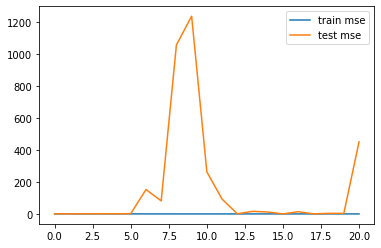

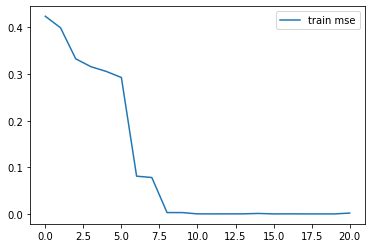

In [13]:
#Let's see how the error changes with the degree of the polynomial
plot_train_vs_test_curves(X, Y)
